In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read the data from /input/train.csv
data = pd.read_csv("train.csv")

In [21]:
X = data.drop(['Class', 'id'], axis=1)
y = data['Class']

# split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42)

In [40]:
list(X_train.columns)

['Mean_Integrated',
 'SD',
 'EK',
 'Skewness',
 'Mean_DMSNR_Curve',
 'SD_DMSNR_Curve',
 'EK_DMSNR_Curve',
 'Skewness_DMSNR_Curve']

<AxesSubplot:>

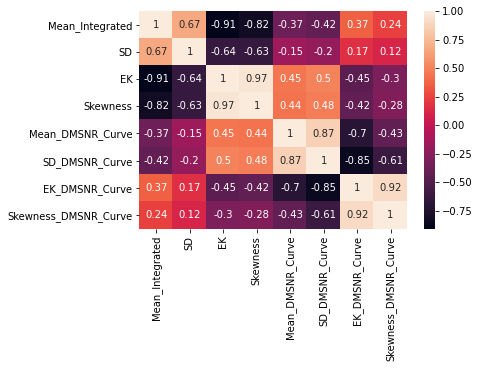

In [9]:
sns.heatmap(X.corr(), annot=True)

<Figure size 1152x1152 with 0 Axes>

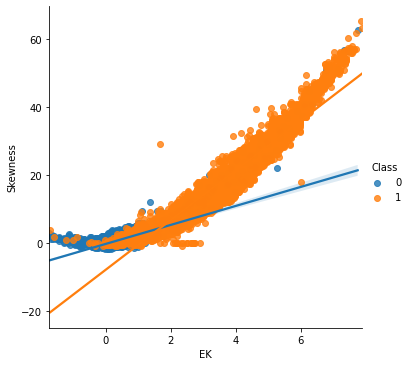

In [18]:
plt.figure(figsize=(16, 16))

sns.lmplot(x="EK", y="Skewness", data=data, hue='Class')

In [ ]:
plt.figure(figsize=(10, 10))

sns.swarmplot(x=data["Class"], 
              y=data["SD_DMSNR_Curve"])

In [ ]:
plt.figure(figsize=(16, 16))

sns.lmplot(x="EK", y="Skewness", data=data, hue='Class', fit_reg=False)

# Principal-Component Analysis

In [19]:
from sklearn.decomposition import PCA

In [37]:
#principal component analysis on X_train
pca = PCA(n_components=5)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)


In [38]:
model = xgb.XGBClassifier(max_depth=4, n_estimators=128, learning_rate=0.1)

model.fit(X_train_pca, y_train)

y_pred = model.predict_proba(X_val_pca)

print("Log loss: %f" % log_loss(y_val, y_pred))

Log loss: 0.040624


In [39]:
#finding the training loss
y_pred_train = model.predict_proba(X_train_pca)
print("Log loss: %f" % log_loss(y_train, y_pred_train))

Log loss: 0.036263
